In [129]:
# !/usr/bin/python
import sys, traceback
import cv2
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv


In [130]:
class options:
    def __init__(self):
        self.image = "DuckweedTest1.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.debug_outdir = args.outdir  # set output directory


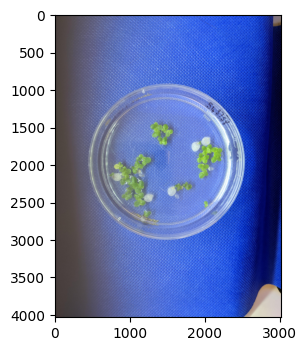

In [141]:
# Read image
img, path, filename = pcv.readimage(filename=args.image)


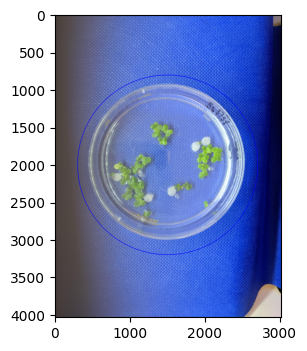

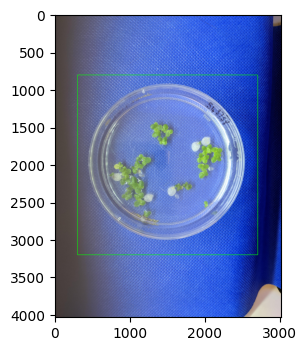

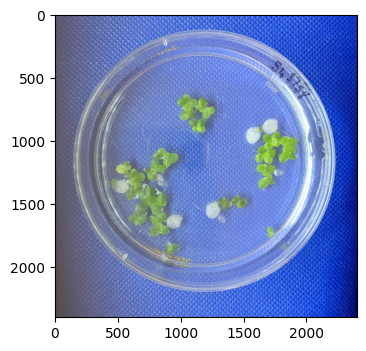

In [142]:
roi_contour, roi_hierarchy = pcv.roi.circle(img=img, x=1500, y=2000, r=1200)
# print(roi_contour)
# print(roi_hierarchy)
img = pcv.auto_crop(img, roi_contour[0], padding_x=0, padding_y=0, color='black')

In [143]:
# # Convert RGB to HSV and extract the saturation channel
# s = pcv.rgb2gray_hsv(rgb_img=img, channel='h')

In [144]:
# # Threshold the saturation image
# s_thresh = pcv.threshold.binary(gray_img=s, threshold=100, max_value=90, object_type='dark')

# # Median Blur
# # s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=15)
# # s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=10)

In [145]:
# # Apply mask (for VIS images, mask_color=white)
# masked = pcv.apply_mask(img, mask=s_thresh, mask_color='white')

# dimensions = masked.shape
 
# # height, width, number of channels in image
# height = masked.shape[0]
# width = masked.shape[1]
# Total_pixels = height * width
# print(Total_pixels)

# # Identify objects
# # id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
# masked_h = pcv.rgb2gray_hsv(rgb_img=masked, channel='h')
# print(cv2.countNonZero(masked_h))


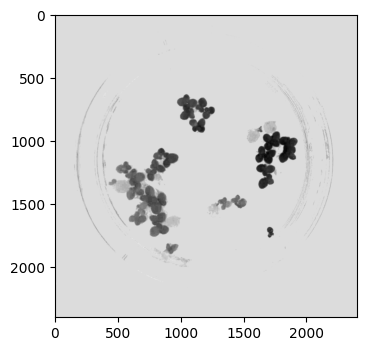

In [146]:
test_img = img
# Median Blur
# s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=15)
# s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=10)
# bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=s_cnt)
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
# masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')
# masked_l = pcv.rgb2gray_lab(rgb_img=masked, channel='l')


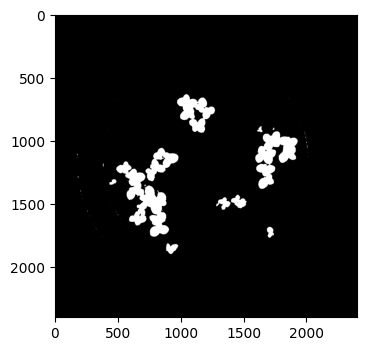

5764801
268930
4.665035271815974


In [147]:
# Threshold the green-magenta and blue images
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
# maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
# maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=115, max_value=255, object_type='dark')
# maskedb_thresh1 = pcv.threshold.binary(gray_img=masked_b, threshold=135, max_value=255, object_type='light')
# maskedl_thresh = pcv.threshold.binary(gray_img=masked_l, threshold=115, max_value=255, object_type='dark')
# maskedl_thresh1 = pcv.threshold.binary(gray_img=masked_l, threshold=135, max_value=255, object_type='light')

# height, width, number of channels in image
height = maskeda_thresh.shape[0]
width = maskeda_thresh.shape[1]
total_pixels = height * width
print(total_pixels)

# Identify objects
# id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
duckweed_pixels = cv2.countNonZero(maskeda_thresh)
print(duckweed_pixels)
pct_duckweed = ((duckweed_pixels / total_pixels) * 100 )
print(pct_duckweed)

In [ ]:
# # Join the thresholded saturation and blue-yellow images (OR)
# ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
# ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

In [ ]:
# test_img = masked

# bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

# # Apply Mask (for VIS images, mask_color=white)
# masked = pcv.apply_mask(img, mask=bs, mask_color='white')

# # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
# masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
# masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

# # Threshold the green-magenta and blue images
# maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
# maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
# maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

# # Join the thresholded saturation and blue-yellow images (OR)
# ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
# ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

# # Fill small objects
# ab_fill = pcv.fill(bin_img=ab, size=200)

In [100]:
# # Convert RGB to LAB and extract the Blue channel
# b = pcv.rgb2gray_lab(img, channel='b')

# # Threshold the saturation image
# blue_thresh = pcv.threshold.binary(gray_img=b, threshold=100, max_value=90, object_type='dark')

In [108]:
# Threshold the blue image
# b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
# b_cnt = pcv.threshold.binary(gray_img=b, threshold=110, max_value=255, object_type='light')

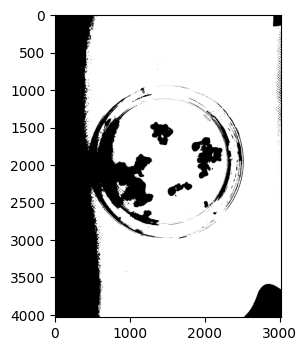

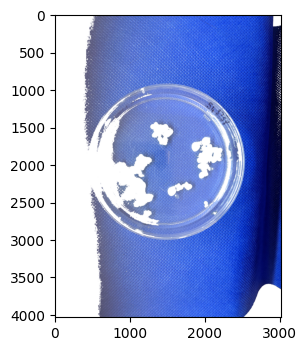

In [103]:
# binary = pcv.threshold.binary(gray_img=b_cnt, threshold=115, 
#                                       max_value=255, object_type='dark')

# masked = pcv.apply_mask(img, mask=binary, mask_color='white')

In [93]:
# print(cv2.countNonZero(maskeda_thresh))

12037972


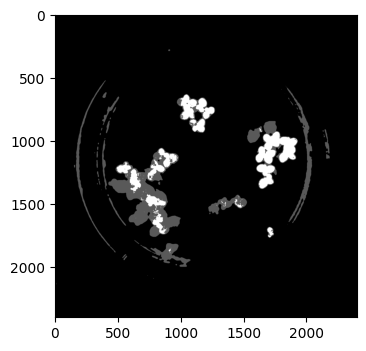

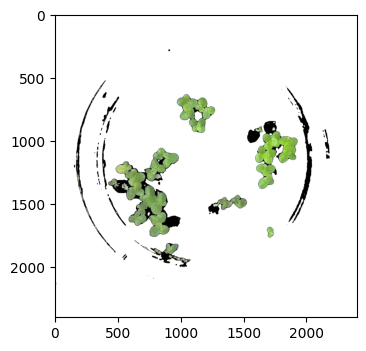

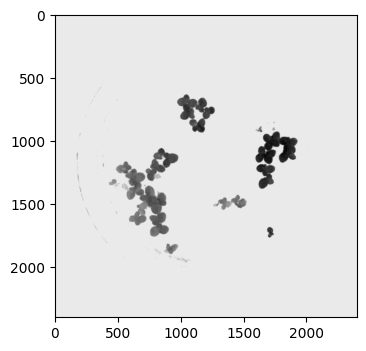

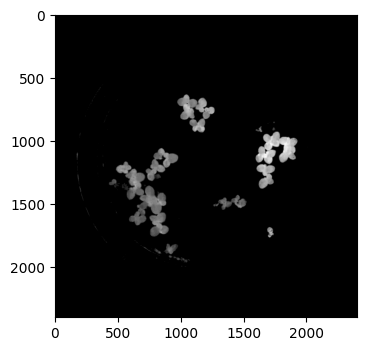

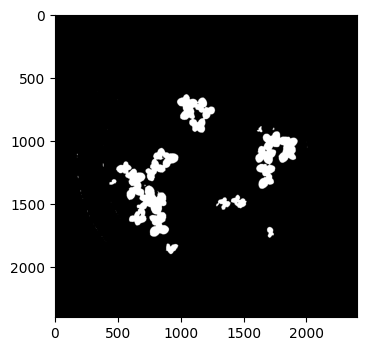

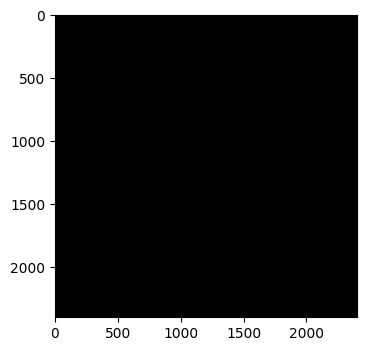

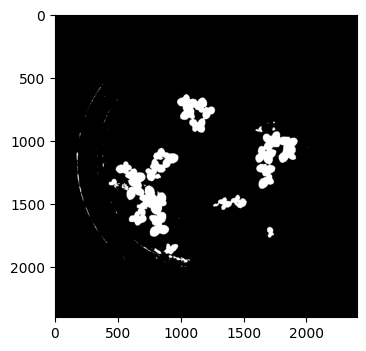

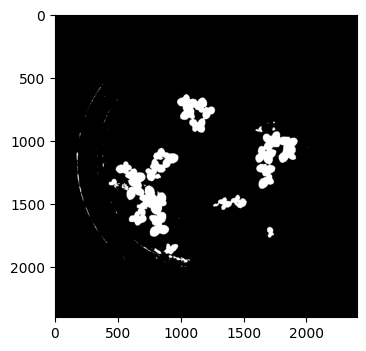

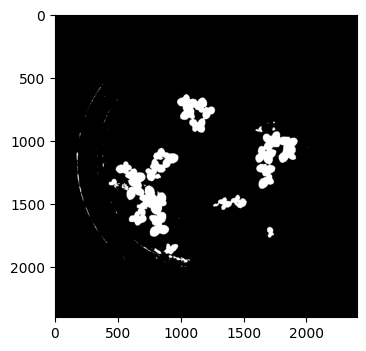

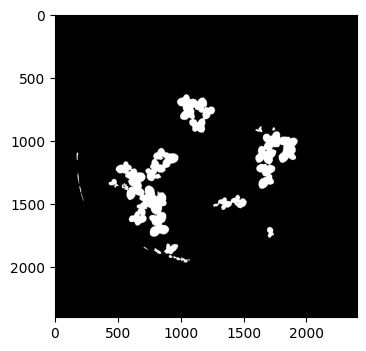

In [69]:
# bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

# # Apply Mask (for VIS images, mask_color=white)
# masked = pcv.apply_mask(img, mask=bs, mask_color='white')

# # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
# masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
# masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

# # Threshold the green-magenta and blue images
# maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
# maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
# maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

# # Join the thresholded saturation and blue-yellow images (OR)
# ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
# ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

# # Fill small objects
# ab_fill = pcv.fill(bin_img=ab, size=200)

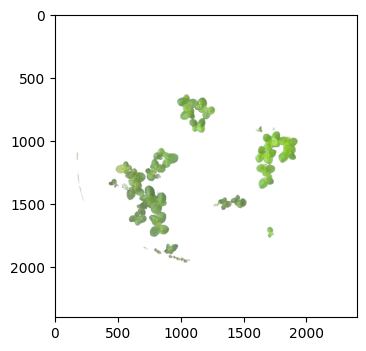

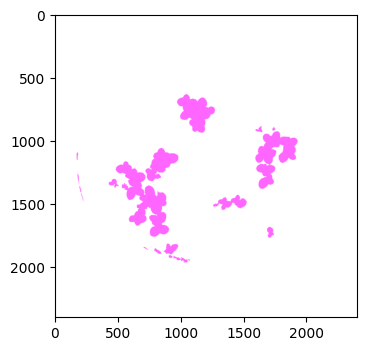

283817


In [82]:
# # Apply mask (for VIS images, mask_color=white)
# masked2 = pcv.apply_mask(masked, mask=ab_fill, mask_color='white')

# # Identify objects
# id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)

# print(cv2.countNonZero(ab_fill))

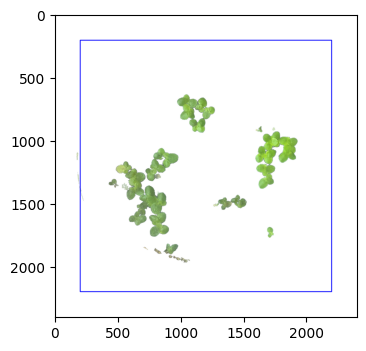

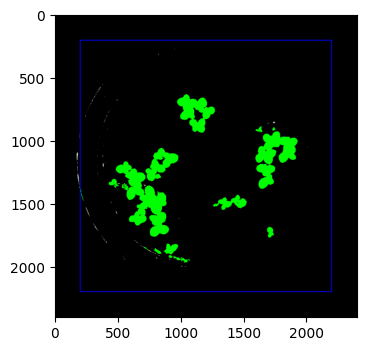

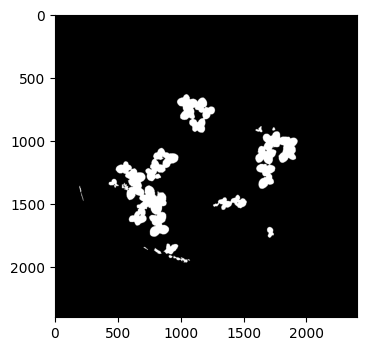

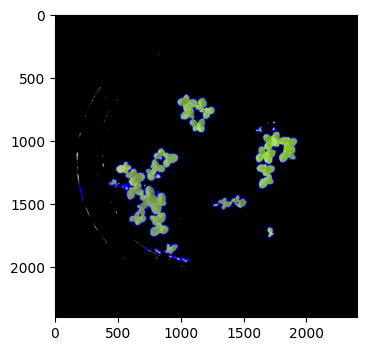

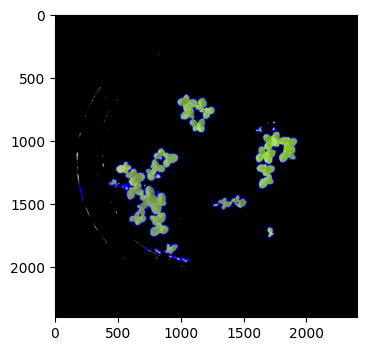

In [77]:
#  roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=200, y=200, h=2000, w=2000)

# # Decide which objects to keep
# roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
#                                                            roi_hierarchy=roi_hierarchy, 
#                                                            object_contour=id_objects, 
#                                                            obj_hierarchy=obj_hierarchy,
#                                                            roi_type='partial')

# # Object combine kept objects
# obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

In [79]:
fill_image = pcv.fill(img, 200)

RuntimeError: Image is not binary

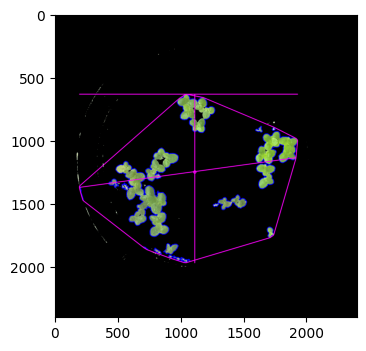

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [78]:
# # Find shape properties, output shape image (optional)
# shape_imgs = pcv.analyze_object(img=img, obj=obj, mask=mask)

# print(shape_imgs)

In [83]:
# duckweed_pixels = 0
# for i in range(img.shape[0]): #im.shape[0] is the y-axis
#     for j in range(img.shape[1]): #im.shape[1] is the x returns X and Y axes of the image
#         if img[i, j][0] > 0.9*img[i, j][1]:  #If more blue than green in pixel than set to black.         
#             img[i, j] = [0, 0, 0]
#         if np.array([x < 90 for x in img[i, j]]).all():
#             img[i, j] = [0, 0, 0]
#         else:
#             duckweed_pixels += 1

# print(duckweed_pixels)

287366


In [ ]:



# ### Main workflow
# def main():
   
 
  

 


#     # Fill small objects
#     # b_fill = pcv.fill(b_thresh, 10)

#     # Join the thresholded saturation and blue-yellow images
#     bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

#     # Apply Mask (for VIS images, mask_color=white)
#     masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')

#     # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
#     masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
#     masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

#     # Threshold the green-magenta and blue images
#     maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
#     maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
#     maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

#     # Join the thresholded saturation and blue-yellow images (OR)
#     ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
#     ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

#     # Fill small objects
#     ab_fill = pcv.fill(bin_img=ab, size=200)

#     # Apply mask (for VIS images, mask_color=white)
#     masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')

#     # Identify objects
#     id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)

#     # Define ROI
#     roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=100, y=100, h=200, w=200)

#     # Decide which objects to keep
#     roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
#                                                                roi_hierarchy=roi_hierarchy, 
#                                                                object_contour=id_objects, 
#                                                                obj_hierarchy=obj_hierarchy,
#                                                                roi_type='partial')

#     # Object combine kept objects
#     obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

#     ############### Analysis ################

#     outfile=False
#     if args.writeimg == True:
#         outfile = args.outdir + "/" + filename


#     # Shape properties relative to user boundary line (optional)
#     boundary_img1 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, line_position=1680)

#     # Determine color properties: Histograms, Color Slices, output color analyzed histogram (optional)
#     color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, hist_plot_type='all')

#     # Pseudocolor the grayscale image
#     pseudocolored_img = pcv.visualize.pseudocolor(gray_img=s, mask=kept_mask, cmap='jet')

#     # Write shape and color data to results file
#     pcv.print_results(filename=args.result)
